# Linear and Multilinear Regression
# Part 1: Handout
## 1.1. Definitions
**Linear Regression**: a fundamental statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, which can be expressed using a straight line equation.

**Simple Linear Regression**: In simple linear regression, there is only one independent variable (X) and one dependent variable (Y). The relationship between X and Y is modeled using a straight line equation: $Y = β_0 + β_1*X + ε$, where $β_0$ is the intercept, $β_1$ is the slope, and $ε$ is the error term.

**Multiple Linear Regression**: Multiple linear regression involves more than one independent variable. The relationship between the dependent variable Y and multiple independent variables $X_1, X_2, ..., X_n$ is represented as: $Y = β_0 + β_1X_1 + β_2X_2 + ... + β_n*X_n + ε$.

**Coefficient Estimation**: The coefficients (β0, β1, β2, ..., βn) are estimated using various techniques such as ordinary least squares (OLS) method to minimize the sum of squared errors between the observed and predicted values.

**Model Evaluation**: R-squared (R2) and Root Mean Squared Error (RMSE) are commonly used metrics to evaluate the performance of regression models. R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. RMSE represents the square root of the average squared differences between observed and predicted values.

## 1.2. Simple Linear Regression
In this example, we'll use a dataset (Retrieved from https://www.kaggle.com/datasets/vinayak121/steels-data-set on Feb 24, 2024) containing measurements of ultimate tensile stress (dependent variable) and temperature (independent variable) to perform simple linear regression. 
We'll apply the method of least squares to estimate the regression parameters and analyze residuals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Load the dataset
data = pd.read_csv('tensile_properties_steels_cleaned.csv')

print(data.columns)
print(data.shape)

Index(['Alloy ID', 'Alloy', 'Temperature, [C]', 'Yield Stress, [MPa]',
       'Ultimate Tensile Stress, [MPa]', 'Tensile elongation [%]',
       'Reduction area [%]', 'Fe', 'C', 'Cr', 'Mn', 'Si', 'Ni', 'Co', 'Mo',
       'W', 'Nb', 'Al', 'P', 'Cu', 'Ti', 'Ta', 'Hf', 'Re', 'V', 'B', 'N', 'O',
       'S', 'Zr', 'Y'],
      dtype='str')
(362, 31)


C:\Users\Ethan Z\AppData\Local\Temp\ipykernel_18120\3630790900.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Temperature, [C]'][mask], data['Ultimate Tensile Stress, [MPa]'][mask], label=alloy_id, cmap='plasma')


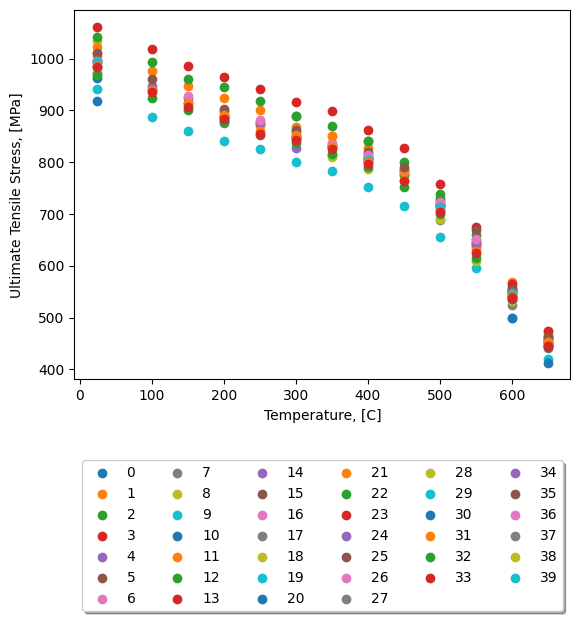

In [3]:
#Some data exploration
# Plot tensile strength vs. temperature

for alloy_id in range(data['Alloy ID'].unique().shape[0]):
    mask = data['Alloy ID'] == alloy_id
    plt.scatter(data['Temperature, [C]'][mask], data['Ultimate Tensile Stress, [MPa]'][mask], label=alloy_id, cmap='plasma')

plt.xlabel('Temperature, [C]')
plt.ylabel('Ultimate Tensile Stress, [MPa]')
plt.legend( loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=6)
plt.show()


Let's work with a subset of 1 alloy type.

In [7]:
from sklearn.linear_model import LinearRegression

# Extract independent (X) and dependent (Y) variables
alloy_eg = 9
sub_data = data[data['Alloy ID'] == alloy_eg] # take only one alloy
X = sub_data[['Temperature, [C]']]
Y = sub_data['Ultimate Tensile Stress, [MPa]']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])


Intercept: 997.3396114252673
Coefficient: -0.7496927316095571


Another way to do this is with statsmodel

## Note
For multiple linear regression, all you need to do is to define X as a multidimensional array where each column is a feature

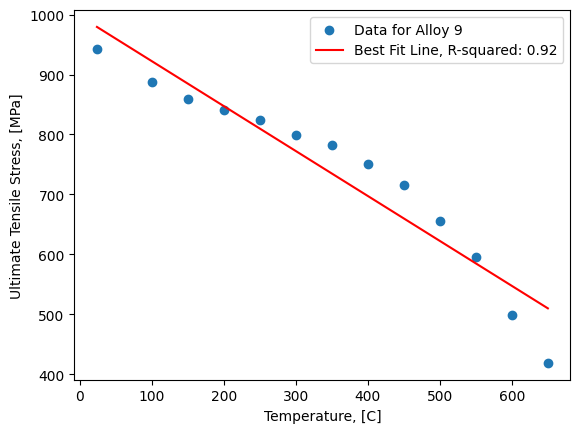

In [8]:
#draw the line of best fit
plt.scatter(sub_data['Temperature, [C]'], sub_data['Ultimate Tensile Stress, [MPa]'], label='Data for Alloy {}'.format(alloy_eg))
plt.plot(X, model.predict(X), color='red', label='Best Fit Line, R-squared: {}'.format(round(model.score(X, Y), 2)))
plt.xlabel('Temperature, [C]')
plt.ylabel('Ultimate Tensile Stress, [MPa]')
plt.legend()
plt.show()

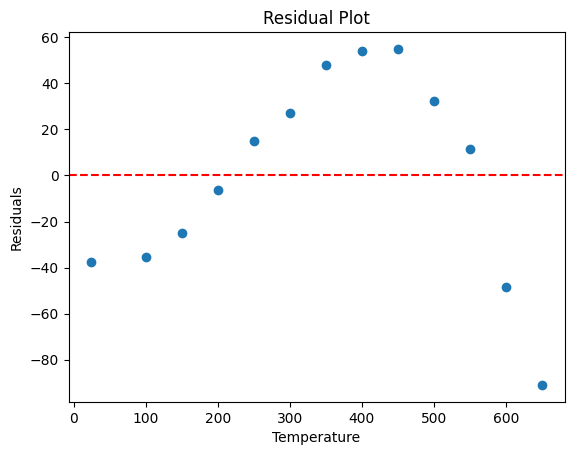

In [9]:
# Predict tensile strength using the model
predicted_Y = model.predict(X)

# Calculate residuals
residuals = Y - predicted_Y

# Plot residuals
plt.scatter(X, residuals)
plt.title('Residual Plot')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [12]:
import statsmodels.api as sm

# Extract independent (X) and dependent (Y) variables for a specific alloy
alloy_eg = 9
sub_data = data[data['Alloy ID'] == alloy_eg]
X = sub_data[['Temperature, [C]']]
Y = sub_data['Ultimate Tensile Stress, [MPa]']

# Add a constant term to include the intercept in the model
X_const = sm.add_constant(X)

# Fit the regression model using Ordinary Least Squares (OLS)
s_model = sm.OLS(Y, X_const).fit()

# Print the regression coefficients
print("Intercept:", s_model.params['const'])
print("Coefficient for Temperature, [C]:", s_model.params['Temperature, [C]'])

Intercept: 997.3396114252681
Coefficient for Temperature, [C]: -0.7496927316095584


You can get statistically relevant metrics by printing the summary

In [13]:
s_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Ultimate Tensile Stress, [MPa]   R-squared:                       0.916
Model:                                        OLS   Adj. R-squared:                  0.908
Method:                             Least Squares   F-statistic:                     119.5
Date:                            Thu, 12 Feb 2026   Prob (F-statistic):           3.01e-07
Time:                                    18:57:45   Log-Likelihood:                -67.432
No. Observations:                              13   AIC:                             138.9
Df Residuals:                                  11   BIC:                             140.0
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              997.3396     27.200     36.667      0.000     937.473    1057.206
Temperature, [C]    -0.7497      0.069    -10.933      0.000      -0.901      -0.599
==============================================================================
Omnibus:                        0.848   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.762
Skew:                          -0.460   Prob(JB):                        0.683
Kurtosis:                       2.252   Cond. No.                         826.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
s_model.predict(X_const)

70    979.421955
71    922.370338
72    884.885702
73    847.401065
74    809.916429
75    772.431792
76    734.947155
77    697.462519
78    659.977882
79    622.493246
80    585.008609
81    547.523972
82    510.039336
dtype: float64

# Part 2: Report
You are provided with the dataset MDS-4: Properties of Chemical Elements, which contains four continuous periodic properties (atomic radius, electron affinity, ionization energy, and electronegativity) measured for 38 chemical elements. Each element is also labeled as metallic or non-metallic. In this exercise, you will explore linear relationships between continuous variables and use plots to reason about model behavior, without performing hypothesis testing.

Run the following cell once to install and load the dataset:

In [23]:
# !pip install MDSData #might need to replace % with ! in some environments

In [25]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mdsdata import MDS4
import pandas as pd

# Load dataset as a DataFrame
chem_elem = MDS4.load_data(as_frame=True)
df = chem_elem.frame
df.head() # TIP: always good to inspect the data after loading


,atomic_radius,electron_affinity,ionization energy,electronegativity,target
0,1.82,59.63,520.22,0.98,1
1,2.27,52.87,495.85,0.93,1
2,2.75,48.39,418.81,0.82,1
3,3.03,46.88,403.03,0.82,1
4,3.43,45.51,375.71,0.79,1


In [26]:
# Q1: Multiple linear regression (electronegativity ~ atomic_radius + electron_affinity + ionization energy)

y = df['electronegativity']
X = df[['atomic_radius', 'electron_affinity', 'ionization energy']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      electronegativity   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     104.7
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           3.03e-17
Time:                        19:03:50   Log-Likelihood:                -1.1120
No. Observations:                  38   AIC:                             10.22
Df Residuals:                      34   BIC:                             16.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9330      0.44

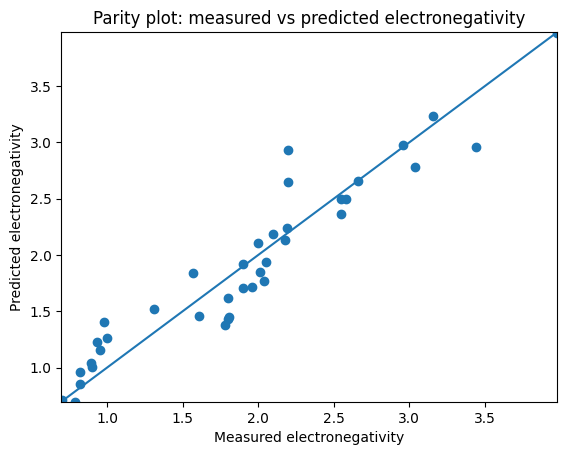


    A parity plot is just plotting the linear model next to the scattered data points, and if the relationship is truly linear, the points would crowd around the line, indicating that it represents the data's relationship well
    


In [ ]:
# Q2: Parity plot (measured vs predicted electronegativity) + brief explanation

# (Re)fit the same model used in Q1 so this cell runs independently
y_true = df['electronegativity']
X = sm.add_constant(df[['atomic_radius', 'electron_affinity', 'ionization energy']])
model = sm.OLS(y_true, X).fit()
y_pred = model.predict(X)

plt.figure()
plt.scatter(y_true, y_pred)

# 45-degree reference line (perfect parity)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims)
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel('Measured electronegativity')
plt.ylabel('Predicted electronegativity')
plt.title('Parity plot: measured vs predicted electronegativity')
plt.show()

print(
    """
    A parity plot is just plotting the linear model next to the scattered data points, and if the relationship is truly linear, the points would crowd around the line, indicating that it represents the data's relationship well
    """
)


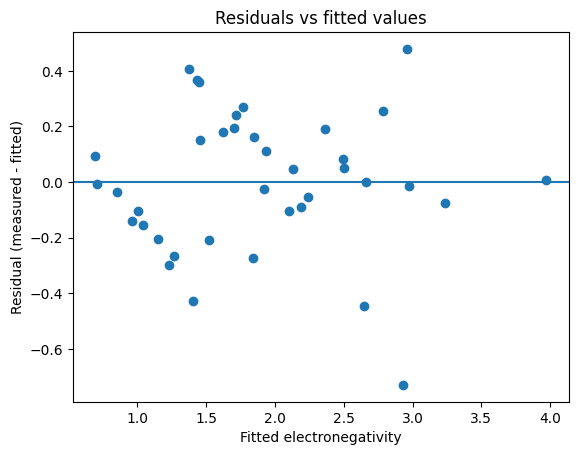


    The residuals here look mostly random, meaning that the underlying relationship seems to be linear, instead of being quadratic or something else.
    


In [31]:
# Q3: Residuals vs fitted values + brief comment

# (Re)fit the same model used in Q1 so this cell runs independently
y_true = df['electronegativity']
X = sm.add_constant(df[['atomic_radius', 'electron_affinity', 'ionization energy']])
model = sm.OLS(y_true, X).fit()
fitted = model.predict(X)
residuals = y_true - fitted

plt.figure()
plt.scatter(fitted, residuals)
plt.axhline(0)
plt.xlabel('Fitted electronegativity')
plt.ylabel('Residual (measured - fitted)')
plt.title('Residuals vs fitted values')
plt.show()

print(
    """
    The residuals here look mostly random, meaning that the underlying relationship seems to be linear, instead of being quadratic or something else.
    """
)


Group summary by target (0 = non-metallic, 1 = metallic):


atomic_radius                        electron_affinity                \
                mean       var median count              mean           var   
target                                                                        
0           1.773125  0.067236  1.825    16        174.461250  12797.485545   
1           2.288636  0.286298  2.090    22         44.558636   3094.194327   

                     ionization energy                                \
        median count              mean           var    median count   
target                                                                 
0       165.57    16       1099.095625  57679.765533  1024.405    16   
1        43.07    22        601.410455  22565.069071   578.195    22   

       electronegativity                         
                    mean       var median count  
target                                           
0               2.608125  0.331523   2.55    16  
1               1.380909  0.248980   1.44    22

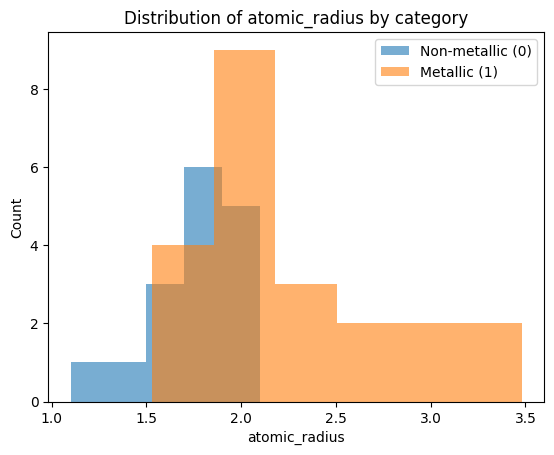

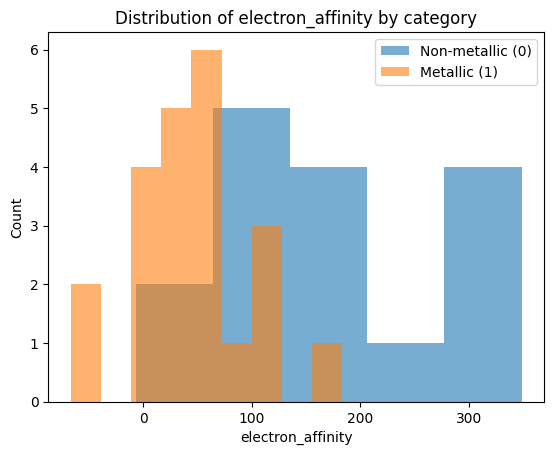

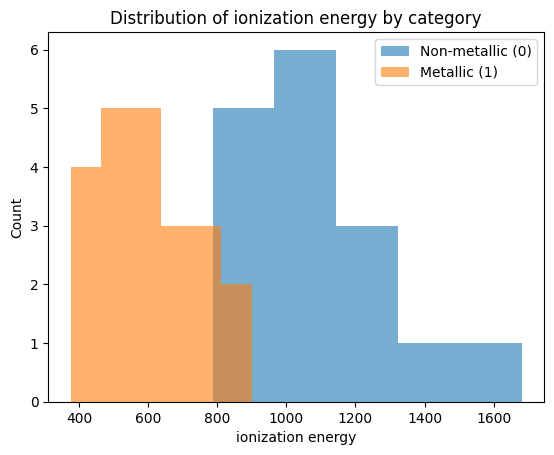

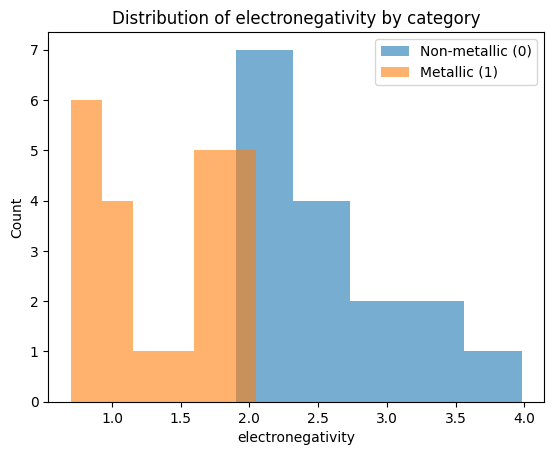

In [ ]:
# Q4: Metallic (1) vs non-metallic (0) distributions for each property + variances + discussion

from IPython.display import display

properties = ['atomic_radius', 'electron_affinity', 'ionization energy', 'electronegativity']

# Variance table (and a few helpful summary stats)
summary = (
    df.groupby('target')[properties]
      .agg(['mean', 'var', 'median', 'count'])
)
print("Group summary by target (0 = non-metallic, 1 = metallic):")
display(summary)

for prop in properties:
    nonmet = df.loc[df['target'] == 0, prop].dropna()
    met = df.loc[df['target'] == 1, prop].dropna()

    plt.figure()
    plt.hist(nonmet, bins='auto', alpha=0.6, label='Non-metallic (0)')
    plt.hist(met, bins='auto', alpha=0.6, label='Metallic (1)')
    plt.xlabel(prop)
    plt.ylabel('Count')
    plt.title(f'Distribution of {prop} by category')
    plt.legend()
    plt.show()

print(
    """
    Metals tend to have higher atomic radii, lower electron affinity, ionization energy, and electronegativity. However, being metallic and non-metallic may not have an influence on these attributes, it's just what the definitions of them are on the periodic table.
    """
)


# Questions
1. Use electronegativity as the response variable and atomic radius, electron affinity, and ionization energy as predictors. Fit a multiple linear regression model using statsmodels and print the model summary.

2. Create a parity plot comparing the measured electronegativity values to the model-predicted values. Briefly explain what a parity plot measures in the context of regression, and describe the behavior you would expect in this plot if the relationship between predictors and response were approximately linear versus nonlinear for this dataset.

3. Plot the residuals versus the fitted values and briefly comment on what they indicate about the relationship between the response variable and each predictor.

4. The column target indicates whether an element is metallic (1) or non-metallic (0). For each of the four properties (atomic radius, electron affinity, ionization energy, electronegativity).
        a. Plot the distributions of metallic and non-metallic elements on the same axes using different colors (one plot per property)\
        b. Calculate the variance of the property values for metallic and non-metallic elements separately\
        b. Based on the distributions and variances, discuss whether the category (metallic vs non-metallic) appears to influence the property and explain your reasoning.

## Submission Instructions - UPDATED

1. Each question must use **one cell**, with all corresponding outputs displayed directly below it.
2. Before submission, make sure **all outputs are visible** (re-run your code one last time). Submit the notebook as a `.ipynb` file on Quercus. 
3. Grading is based on completion. Completion means that **all questions have visible outputs** and all outputs result from your **own** prompts.
4. Questions requiring explanation must be answered in your own words based on your own analysis.
5. "Briefly" explain means no more than 2 sentences.